In [2]:
import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

class MoleculeGraph:
    def __init__(self, atoms, bonds):
        """
        Initialize the molecule graph.
        :param atoms: Dictionary where keys are atom IDs, values are element types.
        :param bonds: List of tuples (atom1, atom2, bond_type) for each bond.
        """
        self.graph = nx.Graph()
        self.add_atoms(atoms)
        self.add_bonds(bonds)
        self.graph_size = self.graph.number_of_nodes()  # Set graph size attribute

    def add_atoms(self, atoms):
        """Add atoms as nodes with element attributes."""
        for atom_id, element in atoms.items():
            self.graph.add_node(atom_id, element=element)

    def add_bonds(self, bonds):
        """Add bonds as edges with bond type attributes."""
        for atom1, atom2, bond_type in bonds:
            self.graph.add_edge(atom1, atom2, bond_type=bond_type)

    def contains_subgraph(self, subgraph):
        """
        Check if another MoleculeGraph's graph exists as a subgraph in this graph.
        :param subgraph: Another MoleculeGraph instance.
        :return: True if subgraph exists, False otherwise.
        """
        matcher = GraphMatcher(self.graph, subgraph.graph,
                               node_match=lambda n1, n2: n1['element'] == n2['element'],
                               edge_match=lambda e1, e2: e1['bond_type'] == e2['bond_type'])
        return matcher.subgraph_is_isomorphic()

    def is_subgraph_of(self, larger_graph):
        """
        Check if this graph exists as a subgraph within another MoleculeGraph.
        :param larger_graph: Another MoleculeGraph instance.
        :return: True if this graph is a subgraph, False otherwise.
        """
        matcher = GraphMatcher(larger_graph.graph, self.graph,
                               node_match=lambda n1, n2: n1['element'] == n2['element'],
                               edge_match=lambda e1, e2: e1['bond_type'] == e2['bond_type'])
        return matcher.subgraph_is_isomorphic()

# Example usage with benzene
benzene_atoms = {
    'C1': 'C', 'C2': 'C', 'C3': 'C', 'C4': 'C', 'C5': 'C', 'C6': 'C',
    'H1': 'H', 'H2': 'H', 'H3': 'H', 'H4': 'H', 'H5': 'H', 'H6': 'H'
}
benzene_bonds = [
    ('C1', 'C2', 'double'), ('C2', 'C3', 'single'),
    ('C3', 'C4', 'double'), ('C4', 'C5', 'single'),
    ('C5', 'C6', 'double'), ('C6', 'C1', 'single'),
    ('C1', 'H1', 'single'), ('C2', 'H2', 'single'),
    ('C3', 'H3', 'single'), ('C4', 'H4', 'single'),
    ('C5', 'H5', 'single'), ('C6', 'H6', 'single')
]

phenol_atoms = {
    'C1': 'C', 'C2': 'C', 'C3': 'C', 'C4': 'C', 'C5': 'C', 'C6': 'C',
    'H1': 'H', 'H2': 'H', 'H3': 'H', 'H4': 'H', 'H5': 'H', 'H6': 'H',
    'O1': 'O'
}
phenol_bonds = [
    ('C1', 'C2', 'double'), ('C2', 'C3', 'single'),
    ('C3', 'C4', 'double'), ('C4', 'C5', 'single'),
    ('C5', 'C6', 'double'), ('C6', 'C1', 'single'),
    ('C1', 'H1', 'single'), ('C2', 'H2', 'single'),
    ('C3', 'H3', 'single'), ('C4', 'H4', 'single'),
    ('C5', 'H5', 'single'), ('C6', 'O1', 'single'),
    ('O1', 'H6', 'single')
]

benzene = MoleculeGraph(benzene_atoms, benzene_bonds)
print("Benzene Graph Size:", benzene.graph_size)

phenol = MoleculeGraph(phenol_atoms, phenol_bonds)
print("Phenol Graph Size:", phenol.graph_size)

# Example of checking subgraph existence (benzene against itself for simplicity)
print("Is benzene a subgraph of phenol?", benzene.is_subgraph_of(phenol))

Benzene Graph Size: 12
Phenol Graph Size: 13
Is benzene a subgraph of phenol? False


The reason it's false here is because the connection between the carbon and hydrogen is gone; think hard about which connections actually matter. In this case, I think that it would just make more sense for the benzene category to only have connectivity between the carbons. That way if there's more stuff outside the benzene, it wouldn't actually matter

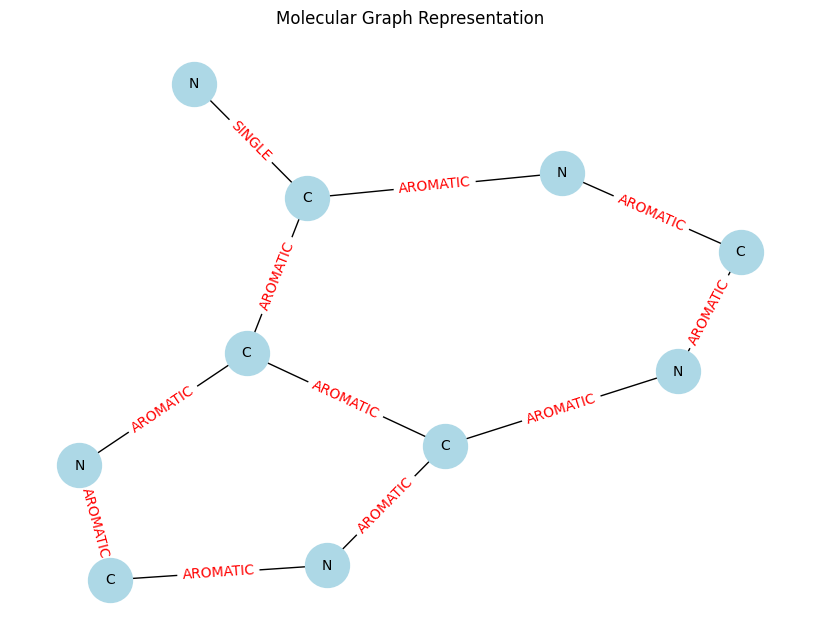

In [7]:
import networkx as nx
!pip install rdkit
from rdkit import Chem
import matplotlib.pyplot as plt

# Define the .mol structure as a string
mol_data = """
  Mass Frontier 1/30/2023 9:47:13 PM 2D

 10 11  0  0  0  0  0  0  0  0  1 V2000
    7.2414   -6.6207    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.2414   -7.3793    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -7.7586    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.9310   -7.3793    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1724   -7.6207    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.7586   -7.0345    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2069   -6.4138    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.9310   -6.6207    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -6.2414    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -5.4828    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  2  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  8  2  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  2  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
M  END
"""

# Load the molecule
mol = Chem.MolFromMolBlock(mol_data)
if mol:
    # Create a NetworkX graph
    G = nx.Graph()

    # Add atoms as nodes
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())

    # Add bonds as edges
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondType())

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using a spring layout
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = {(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()): bond.GetBondType()
                   for bond in mol.GetBonds()}

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color="lightblue", node_size=1000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Molecular Graph Representation")
    plt.show()
else:
    print("Error: Could not parse the .mol file.")

In [6]:
mol_data = """
  Mass Frontier 1/30/2023 9:47:13 PM 2D

 10 11  0  0  0  0  0  0  0  0  1 V2000
    7.2414   -6.6207    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.2414   -7.3793    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -7.7586    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.9310   -7.3793    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1724   -7.6207    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.7586   -7.0345    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2069   -6.4138    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.9310   -6.6207    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -6.2414    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.5862   -5.4828    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  2  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  8  2  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  2  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
M  END
"""

# Load the molecule using RDKit
mol = Chem.MolFromMolBlock(mol_data)

if mol:
    # Extract atom information
    atoms = {atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}

    # Extract bond information
    bonds = []
    for bond in mol.GetBonds():
        atom1 = bond.GetBeginAtomIdx()
        atom2 = bond.GetEndAtomIdx()
        bond_type = str(bond.GetBondType())  # Convert bond type to string for consistent output
        bonds.append((atom1, atom2, bond_type))

    # Initialize MoleculeGraph with atoms and bonds
    molecule_graph = MoleculeGraph(atoms, bonds)

    # Display graph properties
    print("Nodes (Atoms):")
    for node in molecule_graph.graph.nodes(data=True):
        print(node)
    print("\nEdges (Bonds):")
    for edge in molecule_graph.graph.edges(data=True):
        print(edge)
else:
    print("Error: Could not parse the .mol file.")





Nodes (Atoms):
(0, {'element': 'N'})
(1, {'element': 'C'})
(2, {'element': 'N'})
(3, {'element': 'C'})
(4, {'element': 'N'})
(5, {'element': 'C'})
(6, {'element': 'N'})
(7, {'element': 'C'})
(8, {'element': 'C'})
(9, {'element': 'N'})

Edges (Bonds):
(0, 8, {'bond_type': 'AROMATIC'})
(0, 1, {'bond_type': 'AROMATIC'})
(1, 2, {'bond_type': 'AROMATIC'})
(2, 3, {'bond_type': 'AROMATIC'})
(3, 7, {'bond_type': 'AROMATIC'})
(3, 4, {'bond_type': 'AROMATIC'})
(4, 5, {'bond_type': 'AROMATIC'})
(5, 6, {'bond_type': 'AROMATIC'})
(6, 7, {'bond_type': 'AROMATIC'})
(7, 8, {'bond_type': 'AROMATIC'})
(8, 9, {'bond_type': 'SINGLE'})
